In [177]:
import pandas as pd
df1 = pd.read_csv('training_data.txt', delimiter = "\t", header=None, names=["msg"], encoding = 'UTF-8')

In [178]:
import os
import numpy as np
import warnings
from nltk.corpus import stopwords
#import stop_words
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim.models.lsimodel import LsiModel
from gensim import corpora
from pprint import pprint
import re
from autocorrect import spell
from nltk.stem.porter import PorterStemmer

warnings.filterwarnings("ignore")
stop = stopwords.words('english')
stop.extend(['{','}','0','1','2','3','4','5','6','7','8','9','am','pm','would','like','get','today','list','offset','time','water','drink','pls','id','user','task','reminderlist','drinkwater','reminder list','drink water','apiname','userid','taskname', 'u','user_id:','task_name:', 'api_name','exotel', 'api_name:','product_id', 'api','name',"n't",'need', 'thanks','thank','hey','please','hello','user_id','userid', 'plz','a9c0', '676951', 'hi', '727893', '55616','want','need','ll','know','go','tell','check','good','give','go','still','will','help','pl','now','looking','hai','find', 'let','ye','sorry','okay','ok'])
print(stop)
emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE)
exclude = set(string.punctuation)

lemma = WordNetLemmatizer()
p_stemmer = PorterStemmer()
# Function to lemmatize and remove the stopwords
def clean(doc):
    punc_free = "".join(ch for ch in doc if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.lower().split() if i not in stop])
    emoji_free = emoji_pattern.sub(r'', stop_free)  
    #spell_free = " ".join(spell(word) for word in emoji_free.split())
    normalized = " ".join(lemma.lemmatize(word) for word in emoji_free.split())
    re_output =  re.sub(r'\b(\w+)( \1\b)+', r'\1', normalized)
    #spell(word)
    

    return re_output


# Code starts here

# stopwords list
stop=set(stopwords.words('english'))

# string punctuations 
exclude=set(string.punctuation)

# lemmatizer
lemma=WordNetLemmatizer()

# convert headlines to list
headlines= df1['msg'].tolist()

# cleaned data
clean_headlines=[clean(row) for row in headlines]


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
clean_headlines

['u check',
 'score ke update nai milre apke',
 'need hotel near symbiosis college',
 'trying app first time',
 'app bug',
 'nearest atm',
 'u trip',
 'nearest rapair service car',
 'still invalid say',
 'date match update',
 'hi im interested watching running shaadi movienamerunning shaaditask',
 'train',
 'hosur',
 'wake',
 'wish',
 'want know nearest pizza location',
 'like malad goregaon etc',
 '',
 'delete item',
 'r batsman',
 'good evening',
 'want go mumbai darshan',
 'want punjab bank atm',
 'ping numeral min whenever wan na score',
 'thank u detail',
 'bus today night ahmadabad bikaner volvo sleeper',
 'gionee service center jaipur',
 'dont want book got cheaper flight make trip',
 'kuch puch sakata hu',
 'stop reminding',
 'yamans3 etc',
 'cold drink offer large bottle',
 'tomorrow',
 'tell ask someone',
 'call manish s milling tomorrow 11am morning',
 'cab detail',
 'want immediately',
 'please',
 'stilll recieved recgarge',
 'subway near location',
 'virat kohli still play

In [179]:
df_clean=pd.DataFrame(clean_headlines)
print(df_clean.head(20))

                                                    0
0                                             u check
1                      score ke update nai milre apke
2                   need hotel near symbiosis college
3                               trying app first time
4                                             app bug
5                                         nearest atm
6                                              u trip
7                          nearest rapair service car
8                                   still invalid say
9                                   date match update
10  hi im interested watching running shaadi movie...
11                                              train
12                                              hosur
13                                               wake
14                                               wish
15                   want know nearest pizza location
16                            like malad goregaon etc
17                          

In [180]:
df_new=pd.concat([df1,df_clean],axis=1,ignore_index=False)
df_new.head(20)

,msg,0
0,can u do check in for me,u check
1,score ke update nai milre apke,score ke update nai milre apke
2,i need a hotel near symbiosis college,need hotel near symbiosis college
3,i have trying this app for first time,trying app first time
4,your app have some bugs,app bug
5,any nearest atm,nearest atm
6,us trip,u trip
7,is their any nearest rapair services of cars,nearest rapair service car
8,still invalid it says,still invalid say
9,_date_ s match update,date match update


In [181]:
df_new.columns=['Original msg','Processed msg']
#print(df_new['Processed msg'].str.contains('rem').any())

In [ ]:
Flights, Trains, Cabs,Reminders, Recharge, Nearby,Others

In [182]:
Search_for_These_values = ['rem','wake','call'] 
#creating list 
pattern = '|'.join(Search_for_These_values)
df_new['Reminder'] = df_new['Processed msg'].str.contains(pattern) 
df_new['Reminder'] = df_new['Reminder'].map({True: 1, False: 0})

In [36]:
#df_new[df_new['Flight']==0]

In [183]:
Search_for_These_values = ['rech','recg','vodafone','dth','DTH','airtel'] 
#creating list 
pattern = '|'.join(Search_for_These_values)
df_new['Recharge'] = df_new['Processed msg'].str.contains(pattern) 
df_new['Recharge'] = df_new['Recharge'].map({True: 1, False: 0})

In [184]:
Search_for_These_values = ['flig','trip','airport','air ticket','Airport','airways','passport'] 
#creating list 
pattern = '|'.join(Search_for_These_values)
df_new['Flight'] = df_new['Processed msg'].str.contains(pattern) 
df_new['Flight'] = df_new['Flight'].map({True: 1, False: 0})
#df_new[df_new['Flight']==1]

In [185]:
Search_for_These_values = ['near','nearest','nearby','location','hotel','check','mumbai','service center'] 
#creating list 
pattern = '|'.join(Search_for_These_values)
df_new['Nearby'] = df_new['Processed msg'].str.contains(pattern) 
df_new['Nearby'] = df_new['Nearby'].map({True: 1, False: 0})
#df_new[df_new['Nearby']==1]

In [186]:
Search_for_These_values = ['match','play','score','batsmen'] 
#creating list 
pattern = '|'.join(Search_for_These_values)
df_new['Sport'] = df_new['Processed msg'].str.contains(pattern) 
df_new['Sport'] = df_new['Sport'].map({True: 1, False: 0})
#df_new[df_new['Sport']==1]

In [187]:
Search_for_These_values = ['uber','ola','UBER','OLA','cab'] 
#creating list 
pattern = '|'.join(Search_for_These_values)
df_new['Cab'] = df_new['Processed msg'].str.contains(pattern) 
df_new['Cab'] = df_new['Cab'].map({True: 1, False: 0})
#df_new[df_new['Cab']==1]

In [188]:
Search_for_These_values = ['train','TRAIN','passenger','railway','local'] 
#creating list 
pattern = '|'.join(Search_for_These_values)
df_new['Train'] = df_new['Processed msg'].str.contains(pattern) 
df_new['Train'] = df_new['Train'].map({True: 1, False: 0})
#df_new[df_new['Train']==1]

In [191]:
df_new.head()

,Original msg,Processed msg,Reminder,Recharge,Flight,Nearby,Sport,Cab,Train,Outlier
0,can u do check in for me,u check,0,0,0,1,0,0,0,0
1,score ke update nai milre apke,score ke update nai milre apke,0,0,0,0,1,0,0,0
2,i need a hotel near symbiosis college,need hotel near symbiosis college,0,0,0,1,0,0,0,0
3,i have trying this app for first time,trying app first time,0,0,0,0,0,0,0,1
4,your app have some bugs,app bug,0,0,0,0,0,0,0,1


In [192]:
df_new['Outlier']= (df_new['Reminder']==0) & (df_new['Recharge']==0) & (df_new['Flight']==0) & (df_new['Cab']==0) & (df_new['Train']==0) & (df_new['Nearby']==0) & (df_new['Sport']==0)
df_new['Outlier'] = df_new['Outlier'].map({True: 1, False: 0})

In [73]:
df_new.head()

,Original msg,Processed msg,Reminder,Recharge,Flight,Cab,Train,Nearby,Sport,Outlier
0,can u do check in for me,u check,0,0,0,0,0,1,0,0
1,score ke update nai milre apke,score ke update nai milre apke,0,0,0,0,0,0,1,0
2,i need a hotel near symbiosis college,need hotel near symbiosis college,0,0,0,0,0,1,0,0
3,i have trying this app for first time,trying app first time,0,0,0,0,0,0,0,1
4,your app have some bugs,app bug,0,0,0,0,0,0,0,1


In [193]:
import copy
df_new1=copy.deepcopy(df_new)

In [194]:
def label_race(row):
    if row['Reminder'] == 1:
       return 'Reminder'
    elif row['Recharge'] == 1:
       return 'Recharge'
    elif row['Flight'] == 1:
       return 'Flight'
    elif row['Train'] == 1:
       return 'Train'
    elif row['Cab'] == 1:
       return 'Cab' 
    elif row['Nearby'] == 1:
       return 'Nearby'
    elif row['Sport'] == 1:
       return 'Sport'
    elif row['Outlier'] == 1:
       return 'Other'


#df_new1['category']=df_new1.apply(label_race,axis=1)

df_new1.drop(['Original msg','Reminder', 'Recharge', 'Flight', 'Train','Cab', 'Nearby',
       'Sport'],axis=1, inplace=True)

print(df_new1)

                                           Processed msg  Outlier
0                                                u check        0
1                         score ke update nai milre apke        0
2                      need hotel near symbiosis college        0
3                                  trying app first time        1
4                                                app bug        1
5                                            nearest atm        0
6                                                 u trip        0
7                             nearest rapair service car        0
8                                      still invalid say        1
9                                      date match update        0
10     hi im interested watching running shaadi movie...        1
11                                                 train        0
12                                                 hosur        1
13                                                  wake        0
14        

In [195]:
# --------------
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
# Sampling only 1000 samples of each category
#df = df.groupby('category').apply(lambda x: x.sample(n=1000, random_state=0))

# Code starts here
all_text= df_new1['Processed msg'].str.lower()
#print(all_text)
tfid_v=TfidfVectorizer(stop_words="english")
tfid_v_model=tfid_v.fit(all_text)
X=tfid_v_model.transform(all_text)
le=preprocessing.LabelEncoder()
le_m=le.fit(df_new1['Outlier'])
#y=le_m.transform(df_new1['Outlier'])
y=df_new1['Outlier']




In [250]:
len(tfid_v_model.get_feature_names())

23244

In [257]:
tfid_v_model.get_feature_names()[12041]

'invalid'

In [117]:
pd.DataFrame(X.toarray(), columns=tfid_v_model.get_feature_names()).head(4)

MemoryError: 

In [219]:

# --------------
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Code starts here
X_train,X_val,y_train ,y_val=train_test_split(X,y,test_size=0.3, random_state=42)
log_reg=LogisticRegression(random_state=0)
log_reg_model=log_reg.fit(X_train,y_train)
y_pred=log_reg_model.predict(X_val)

log_accuracy =accuracy_score(y_val, y_pred)
print(log_accuracy)
nb=MultinomialNB()

nb_model=nb.fit(X_train,y_train)
y_nb_pred=nb_model.predict(X_val)

nb_accuracy =accuracy_score(y_val, y_nb_pred)
print(nb_accuracy)

lsvm=LinearSVC(random_state=0)

lsvm_model=lsvm.fit(X_train,y_train)
y_lsvm_pred=lsvm_model.predict(X_val)

lsvm_accuracy =accuracy_score(y_val, y_lsvm_pred)
print(lsvm_accuracy)

0.9713615305938271
0.93538294928103
0.9823716984537633


In [247]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

rf=RandomForestClassifier(n_estimators=100, random_state=7)
rf_model=rf.fit(X_train,y_train)
rf_y_pred=rf_model.predict(X_val)


print("Training Random Forest:")
#print(classification_report(y_val, y_pred))
print("ACCURACY::", accuracy_score(rf_y_pred, y_val))

lsvm_cm = confusion_matrix(y_val, rf_y_pred)
print("Confusion Matrix:",lsvm_cm)

lsvm_cr = classification_report(y_val, rf_y_pred)
print("Classification Report:", lsvm_cr)

lsvm_f1_score = metrics.f1_score(y_val, rf_y_pred)
print( "F1 Score:",lsvm_f1_score)

Training Random Forest:
ACCURACY:: 0.982913182119006
Confusion Matrix: [[ 5855   261]
 [   23 10482]]
Classification Report:              precision    recall  f1-score   support

          0       1.00      0.96      0.98      6116
          1       0.98      1.00      0.99     10505

avg / total       0.98      0.98      0.98     16621

F1 Score: 0.9866340361445783


In [220]:
model1=OneVsRestClassifier(LinearSVC())
one_lsvm_model=model1.fit(X_train,y_train)
y_one_lsvm_pred=one_lsvm_model.predict(X_val)

one_lsvm_accuracy =accuracy_score(y_val, y_one_lsvm_pred)
print(one_lsvm_accuracy)

0.9823716984537633


In [227]:

print("Training OneVsRest Linear SVM:")
#print(classification_report(y_val, y_pred))
print("ACCURACY::", accuracy_score(y_one_lsvm_pred, y_val))

lsvm_cm = confusion_matrix(y_val, y_one_lsvm_pred)
print("Confusion Matrix:",lsvm_cm)

lsvm_cr = classification_report(y_val, y_one_lsvm_pred)
print("Classification Report:", lsvm_cr)

lsvm_f1_score = metrics.f1_score(y_val, y_one_lsvm_pred)
print( "F1 Score:",lsvm_f1_score)

Training OneVsRest Linear SVM:
ACCURACY:: 0.9823716984537633
Confusion Matrix: [[ 5846   270]
 [   23 10482]]
Classification Report:              precision    recall  f1-score   support

          0       1.00      0.96      0.98      6116
          1       0.97      1.00      0.99     10505

avg / total       0.98      0.98      0.98     16621

F1 Score: 0.9862163052171049


In [222]:
print("Training Linear SVM:")
#print(classification_report(y_val, y_pred))
print("ACCURACY::", accuracy_score(y_lsvm_pred, y_val))

lsvm_cm = confusion_matrix(y_val, y_lsvm_pred)
print("Confusion Matrix:",lsvm_cm)

lsvm_cr = classification_report(y_val, y_lsvm_pred)
print("Classification Report:", lsvm_cr)

lsvm_f1_score = metrics.f1_score(y_val, y_lsvm_pred)
print( "F1 Score:",lsvm_f1_score)

Training Linear SVM:
ACCURACY:: 0.9823716984537633
Confusion Matrix: [[ 5846   270]
 [   23 10482]]
Classification Report:              precision    recall  f1-score   support

          0       1.00      0.96      0.98      6116
          1       0.97      1.00      0.99     10505

avg / total       0.98      0.98      0.98     16621

F1 Score: 0.9862163052171049


In [225]:
print("Training Naives Bayes SVM:")
#print(classification_report(y_val, y_pred))
print("ACCURACY::", accuracy_score(y_nb_pred, y_val))

lsvm_cm = confusion_matrix(y_val, y_nb_pred)
print("Confusion Matrix:",lsvm_cm)

lsvm_cr = classification_report(y_val, y_nb_pred)
print("Classification Report:", lsvm_cr)

lsvm_f1_score = metrics.f1_score(y_val,y_nb_pred)
print( "F1 Score:",lsvm_f1_score)

Training Naives Bayes SVM:
ACCURACY:: 0.93538294928103
Confusion Matrix: [[5571  545]
 [ 529 9976]]
Classification Report:              precision    recall  f1-score   support

          0       0.91      0.91      0.91      6116
          1       0.95      0.95      0.95     10505

avg / total       0.94      0.94      0.94     16621

F1 Score: 0.9489203842861219


In [226]:
print("Training Logistic Regression:")
#print(classification_report(y_val, y_pred))
print("ACCURACY::", accuracy_score(y_pred, y_val))

lsvm_cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:",lsvm_cm)

lsvm_cr = classification_report(y_val, y_pred)
print("Classification Report:", lsvm_cr)

lsvm_f1_score = metrics.f1_score(y_val,y_pred)
print( "F1 Score:",lsvm_f1_score)

Training Logistic Regression:
ACCURACY:: 0.9713615305938271
Confusion Matrix: [[ 5647   469]
 [    7 10498]]
Classification Report:              precision    recall  f1-score   support

          0       1.00      0.92      0.96      6116
          1       0.96      1.00      0.98     10505

avg / total       0.97      0.97      0.97     16621

F1 Score: 0.9778315946348733


In [228]:
import pandas as pd
df_test1 = pd.read_csv('eval_data.csv', encoding = 'UTF-8')
df_test1.head()

,Message,Outlier?
0,i want to buy mobile,True
1,hey i want to buy headphones,True
2,can you please guide me about share market,True
3,then tell me the best and safest way to root m...,True
4,camera nt working,True


In [229]:
# convert headlines to list
headlines1= df_test1['Message'].tolist()

# cleaned data
clean_headlines1=[clean(row) for row in headlines1]

df_clean1=pd.DataFrame(clean_headlines1)
df_test1['Outlier?'] = df_test1['Outlier?'].map({True: 1, False: 0})
df_y_test=df_test1['Outlier?']
df_test1=df_test1['Message']

df_test=pd.concat([df_test1,df_clean1],axis=1,ignore_index=False)

df_test.columns=['Original msg','Processed msg']

In [141]:
df_test.head()

,Original msg,Processed msg
0,i want to buy mobile,want buy mobile
1,hey i want to buy headphones,hey want buy headphone
2,can you please guide me about share market,please guide share market
3,then tell me the best and safest way to root m...,tell best safest way root phone
4,camera nt working,camera nt working


In [230]:
Search_for_These_values = ['rem'] 
#creating list 
pattern = '|'.join(Search_for_These_values)
df_test['Reminder'] = df_test['Processed msg'].str.contains(pattern) 
df_test['Reminder'] = df_test['Reminder'].map({True: 1, False: 0})

Search_for_These_values = ['rech','recg','vodafone','dth','DTH','airtel'] 
#creating list 
pattern = '|'.join(Search_for_These_values)
df_test['Recharge'] = df_test['Processed msg'].str.contains(pattern) 
df_test['Recharge'] = df_test['Recharge'].map({True: 1, False: 0})

Search_for_These_values = ['flig','trip','airport','air ticket','Airport','airways','passport'] 
#creating list 
pattern = '|'.join(Search_for_These_values)
df_test['Flight'] = df_test['Processed msg'].str.contains(pattern) 
df_test['Flight'] = df_test['Flight'].map({True: 1, False: 0})
#df_test[df_test['Flight']==1]

Search_for_These_values = ['near','nearest','nearby','location','hotel','check'] 
#creating list 
pattern = '|'.join(Search_for_These_values)
df_test['Nearby'] = df_test['Processed msg'].str.contains(pattern) 
df_test['Nearby'] = df_test['Nearby'].map({True: 1, False: 0})
#df_test[df_test['Nearby']==1]

Search_for_These_values = ['match','play'] 
#creating list 
pattern = '|'.join(Search_for_These_values)
df_test['Sport'] = df_test['Processed msg'].str.contains(pattern) 
df_test['Sport'] = df_test['Sport'].map({True: 1, False: 0})
#df_test[df_test['Sport']==1]

Search_for_These_values = ['uber','ola','UBER','OLA','cab'] 
#creating list 
pattern = '|'.join(Search_for_These_values)
df_test['Cab'] = df_test['Processed msg'].str.contains(pattern) 
df_test['Cab'] = df_test['Cab'].map({True: 1, False: 0})
#df_test[df_test['Cab']==1]

Search_for_These_values = ['train','TRAIN','passenger','railway','local'] 
#creating list 
pattern = '|'.join(Search_for_These_values)
df_test['Train'] = df_test['Processed msg'].str.contains(pattern) 
df_test['Train'] = df_test['Train'].map({True: 1, False: 0})
#df_test[df_test['Train']==1]

In [231]:
df_test['Outlier']= (df_test['Reminder']==0) & (df_test['Recharge']==0) & (df_test['Flight']==0) & (df_test['Cab']==0) & (df_test['Train']==0) & (df_test['Nearby']==0) & (df_test['Sport']==0)
df_test['Outlier'] = df_test['Outlier'].map({True: 1, False: 0})
df_test.head()

,Original msg,Processed msg,Reminder,Recharge,Flight,Nearby,Sport,Cab,Train,Outlier
0,i want to buy mobile,want buy mobile,0,0,0,0,0,0,0,1
1,hey i want to buy headphones,hey want buy headphone,0,0,0,0,0,0,0,1
2,can you please guide me about share market,please guide share market,0,0,0,0,0,0,0,1
3,then tell me the best and safest way to root m...,tell best safest way root phone,0,0,0,0,0,0,0,1
4,camera nt working,camera nt working,0,0,0,0,0,0,0,1


In [232]:
df_test1=copy.deepcopy(df_test)

In [233]:
#df_test1['category']=df_test1.apply(label_race,axis=1)

df_test1.drop(['Original msg','Reminder', 'Recharge', 'Flight', 'Train','Cab', 'Nearby',
       'Sport', 'Outlier'],axis=1, inplace=True)


In [234]:
all_text=df_test1['Processed msg'].str.lower()
X_test=tfid_v_model.transform(all_text)
#X_test=X_test[:9000]
#y_test=le_m.transform(df_y_test)
y_test=df_y_test
#y_test=y_test[:9000]
y_pred1=log_reg_model.predict(X_test)
#print(len(y_pred1))
#print(len(y_test))
log_accuracy_2 =accuracy_score(y_test, y_pred1)

y_pred2=nb_model.predict(X_test)
nb_accuracy_2 =accuracy_score(y_test, y_pred2)

print(log_accuracy_2)
print(nb_accuracy_2)

y_pred3=lsvm_model.predict(X_test)
lsvm_accuracy_2 =accuracy_score(y_test, y_pred3)


y_pred4=one_lsvm_model.predict(X_test)
one_lsvm_accuracy_2 =accuracy_score(y_test, y_pred4)
print(lsvm_accuracy_2)
print(one_lsvm_accuracy_2)


y_pred5=rf_model.predict(X_test)
rf_accuracy_2 =accuracy_score(y_test, y_pred5)
print(rf_accuracy_2)



0.6447449293177627
0.6508912108174555
0.6472034419176398
0.6472034419176398
0.6410571604179471


In [235]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn import metrics

rf_score = accuracy_score(y_test, y_pred3)
print(rf_score)

rf_cm = confusion_matrix(y_test, y_pred3)
print(rf_cm)

rf_cr = classification_report(y_test, y_pred3)
print( rf_cr)

f1_score = metrics.f1_score(y_test, y_pred3)
print( f1_score)

0.6472034419176398
[[278 523]
 [ 51 775]]
             precision    recall  f1-score   support

          0       0.84      0.35      0.49       801
          1       0.60      0.94      0.73       826

avg / total       0.72      0.65      0.61      1627

0.7297551789077212


In [237]:
y_pred4=df_test['Outlier']
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn import metrics

#rf_score = accuracy_score(y_test, y_pred4)
#print(rf_score)

#rf_cm = confusion_matrix(y_test, y_pred4)
#print(rf_cm)

#rf_cr = classification_report(y_test, y_pred4)
#print( rf_cr)

#f1_score = metrics.f1_score(y_test, y_pred4)
#print( f1_score)

print("Rule Based:")
#print(classification_report(y_test, y_pred4))
print("ACCURACY::", accuracy_score(y_pred4, y_test))

lr_cm = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix:",lr_cm)

lr_cr = classification_report(y_test, y_pred4)
print("Classification Report:", lr_cr)

lr_f1_score = metrics.f1_score(y_test, y_pred4)
print( "F1 Score:",lr_f1_score)

Rule Based:
ACCURACY:: 0.6287645974185617
Confusion Matrix: [[242 559]
 [ 45 781]]
Classification Report:              precision    recall  f1-score   support

          0       0.84      0.30      0.44       801
          1       0.58      0.95      0.72       826

avg / total       0.71      0.63      0.59      1627

F1 Score: 0.7211449676823638


In [238]:
from sklearn.metrics.classification import classification_report, accuracy_score
from sklearn.cross_validation import cross_val_predict

# generate your cross-validation prediction with 10 fold Stratified sampling
y_pred = cross_val_predict(nb_model, X_test.toarray(), y_test, cv=10)
print("NAIVES BAYES:")

print("ACCURACY::", accuracy_score(y_pred, y_test))


nb_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:",nb_cm)


nb_cr = classification_report(y_test, y_pred)
print("Classification Report:", nb_cr)


nb_f1_score = metrics.f1_score(y_test, y_pred)
print( "F1 Score:",nb_f1_score)

NAIVES BAYES:
ACCURACY:: 0.7480024585125998
Confusion Matrix: [[526 275]
 [135 691]]
Classification Report:              precision    recall  f1-score   support

          0       0.80      0.66      0.72       801
          1       0.72      0.84      0.77       826

avg / total       0.75      0.75      0.75      1627

F1 Score: 0.7712053571428572


In [239]:
from sklearn.metrics.classification import classification_report, accuracy_score
from sklearn.cross_validation import cross_val_predict

# generate your cross-validation prediction with 10 fold Stratified sampling
y_pred = cross_val_predict(lsvm_model, X_test.toarray(), y_test, cv=10)
print("Linear SVM:")
#print(classification_report(y_test, y_pred))
print("ACCURACY::", accuracy_score(y_pred, y_test))



lsvm_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:",lsvm_cm)


lsvm_cr = classification_report(y_test, y_pred)
print("Classification Report:", lsvm_cr)


lsvm_f1_score = metrics.f1_score(y_test, y_pred)
print( "F1 Score:",lsvm_f1_score)

Linear SVM:
ACCURACY:: 0.7406269207129687
Confusion Matrix: [[575 226]
 [196 630]]
Classification Report:              precision    recall  f1-score   support

          0       0.75      0.72      0.73       801
          1       0.74      0.76      0.75       826

avg / total       0.74      0.74      0.74      1627

F1 Score: 0.7491082045184305


In [240]:

from sklearn.metrics.classification import classification_report, accuracy_score
from sklearn.cross_validation import cross_val_predict

# generate your cross-validation prediction with 10 fold Stratified sampling
y_pred = cross_val_predict(log_reg_model, X_test.toarray(), y_test, cv=10)
print("Logistic Regression:")
#print(classification_report(y_test, y_pred))
print("ACCURACY::", accuracy_score(y_pred, y_test))


lr_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:",lr_cm)


lr_cr = classification_report(y_test, y_pred)
print("Classification Report:", lr_cr)


lr_f1_score = metrics.f1_score(y_test, y_pred)
print( "F1 Score:",lr_f1_score)

Logistic Regression:
ACCURACY:: 0.7566072526121697
Confusion Matrix: [[628 173]
 [223 603]]
Classification Report:              precision    recall  f1-score   support

          0       0.74      0.78      0.76       801
          1       0.78      0.73      0.75       826

avg / total       0.76      0.76      0.76      1627

F1 Score: 0.752808988764045


In [248]:

from sklearn.metrics.classification import classification_report, accuracy_score
from sklearn.cross_validation import cross_val_predict

# generate your cross-validation prediction with 10 fold Stratified sampling
y_pred = cross_val_predict(rf_model, X_test.toarray(), y_test, cv=10)
print("Random Forest:")
#print(classification_report(y_test, y_pred))
print("ACCURACY::", accuracy_score(y_pred, y_test))


lr_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:",lr_cm)


lr_cr = classification_report(y_test, y_pred)
print("Classification Report:", lr_cr)


lr_f1_score = metrics.f1_score(y_test, y_pred)
print( "F1 Score:",lr_f1_score)

Random Forest:
ACCURACY:: 0.7566072526121697
Confusion Matrix: [[531 270]
 [126 700]]
Classification Report:              precision    recall  f1-score   support

          0       0.81      0.66      0.73       801
          1       0.72      0.85      0.78       826

avg / total       0.76      0.76      0.75      1627

F1 Score: 0.7795100222717148


In [241]:

from sklearn.metrics.classification import classification_report, accuracy_score
from sklearn.cross_validation import cross_val_predict

# generate your cross-validation prediction with 10 fold Stratified sampling
y_pred = cross_val_predict(one_lsvm_model, X_test.toarray(), y_test, cv=10)
print("OneVsRest Classifier Linear SVM:")
#print(classification_report(y_test, y_pred))
print("ACCURACY::", accuracy_score(y_pred, y_test))


lr_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:",lr_cm)


lr_cr = classification_report(y_test, y_pred)
print("Classification Report:", lr_cr)


lr_f1_score = metrics.f1_score(y_test, y_pred)
print( "F1 Score:",lr_f1_score)

OneVsRest Classifier Linear SVM:
ACCURACY:: 0.7406269207129687
Confusion Matrix: [[575 226]
 [196 630]]
Classification Report:              precision    recall  f1-score   support

          0       0.75      0.72      0.73       801
          1       0.74      0.76      0.75       826

avg / total       0.74      0.74      0.74      1627

F1 Score: 0.7491082045184305


In [243]:
def label_race(row):
    if row['Reminder'] == 1:
       return 'Reminder'
    elif row['Recharge'] == 1:
       return 'Recharge'
    elif row['Flight'] == 1:
       return 'Flight'
    elif row['Train'] == 1:
       return 'Train'
    elif row['Cab'] == 1:
       return 'Cab' 
    elif row['Nearby'] == 1:
       return 'Nearby'
    elif row['Sport'] == 1:
       return 'Sport'
    elif row['Outlier'] == 1:
       return 'Other'


df_new['category']=df_new.apply(label_race,axis=1)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

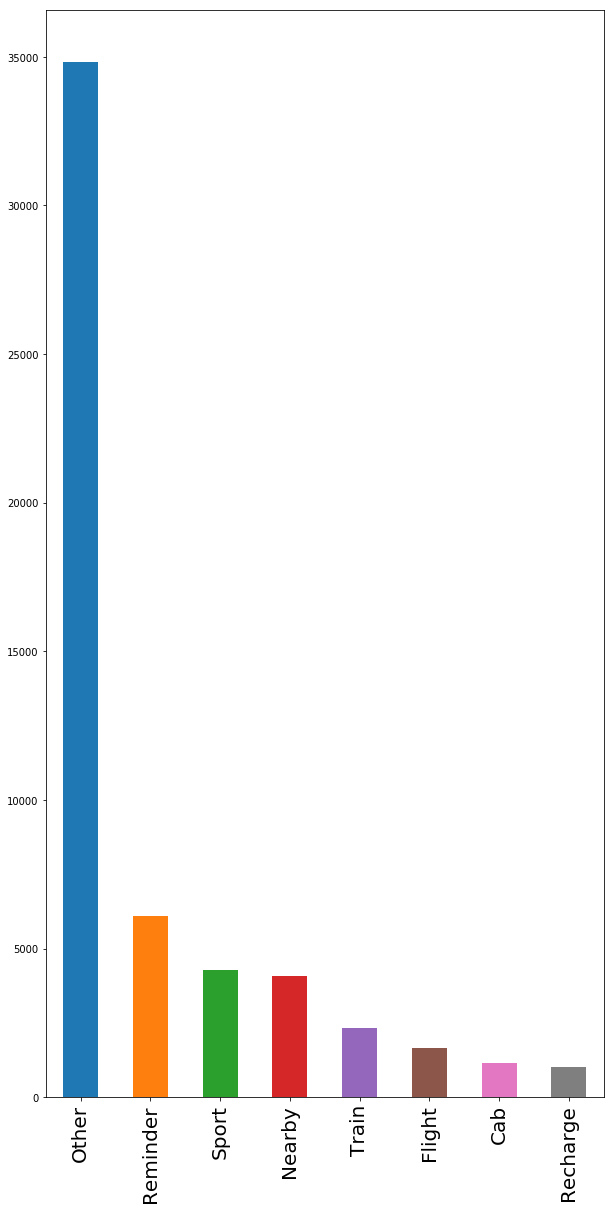

In [244]:
import matplotlib.pyplot as plt
df_new['category'].value_counts().plot(kind='bar')


plt.xticks(fontsize=20)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

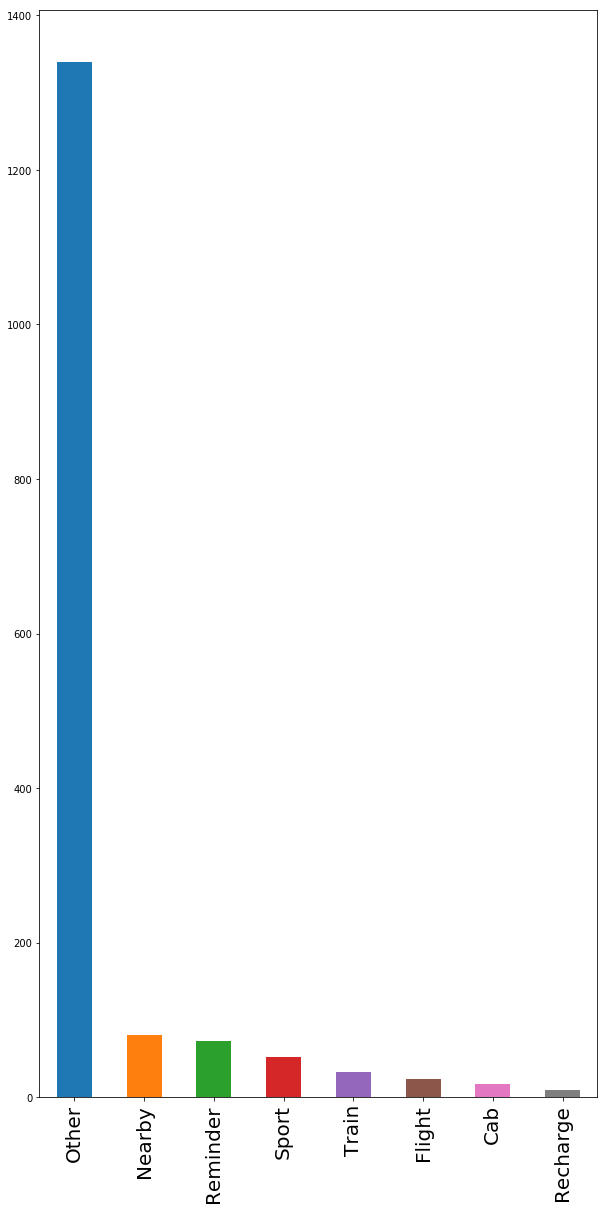

In [246]:

df_test['category']=df_test.apply(label_race,axis=1)
import matplotlib.pyplot as plt
df_test['category'].value_counts().plot(kind='bar')

plt.xticks(fontsize=20)

In [176]:
df_new[df_new['Outlier']==1]

,Original msg,Processed msg,Reminder,Recharge,Flight,Cab,Train,Nearby,Sport,Outlier,category
3,i have trying this app for first time,trying app first time,0,0,0,0,0,0,0,1,Other
4,your app have some bugs,app bug,0,0,0,0,0,0,0,1,Other
8,still invalid it says,still invalid say,0,0,0,0,0,0,0,1,Other
10,"hi, i'm interested in watching running shaadi....",hi im interested watching running shaadi movie...,0,0,0,0,0,0,0,1,Other
12,hosur,hosur,0,0,0,0,0,0,0,1,Other
13,wake up me,wake,0,0,0,0,0,0,0,1,Other
14,wish you the same,wish,0,0,0,0,0,0,0,1,Other
16,"like , malad , goregaon etc",like malad goregaon etc,0,0,0,0,0,0,0,1,Other
17,no,,0,0,0,0,0,0,0,1,Other
18,delete to do item,delete item,0,0,0,0,0,0,0,1,Other


In [251]:
df_test.shape

(1627, 11)